c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


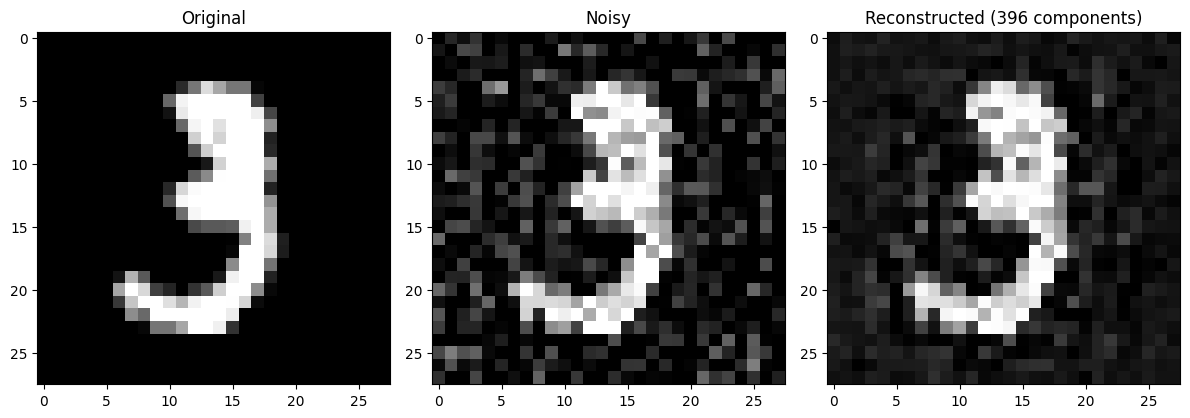

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0  # Normalize pixel values to [0, 1]
y = mnist.target

noise_factor = 0.2
X_noisy = X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)
X_noisy = np.clip(X_noisy, 0.0, 1.0)  
X_noisy = X_noisy.to_numpy()
pca_models = [PCA(n_components=i).fit(X_noisy) for i in range(1, 400, 5)]

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].set_title("Original")
ax[1].set_title("Noisy")
ax[2].set_title("Reconstructed")
image_idx = 10  

original = X.to_numpy()[image_idx].reshape(28,28)
original_noisy = X_noisy[image_idx].reshape(28, 28)
img1 = ax[0].imshow(original, cmap='gray')
img2 = ax[1].imshow(original_noisy, cmap='gray')
img3 = ax[2].imshow(original_noisy, cmap='gray')

def update(frame):
    pca = pca_models[frame]
    reconstructed = pca.inverse_transform(pca.transform(X_noisy))[image_idx].reshape(28, 28)
    img3.set_data(reconstructed)
    img2.set_data(original_noisy)
    ax[2].set_title(f"Reconstructed ({frame*5 + 1} components)")
    return img2, img3

ani = FuncAnimation(fig, update, frames=range(len(pca_models)), interval=200, blit=False)
ani.save("mnist_pca_reconstruction.gif", writer=PillowWriter(fps=10))
plt.tight_layout()
plt.show()
